In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Carga de consolidado y primer filtrado

Subir consolidado

In [3]:
# Ruta del archivo Excel
ruta_archivo = '/content/consolidado_motores.xlsx'

# Cargar el archivo Excel en un DataFrame
consolidado = pd.read_excel(ruta_archivo, sheet_name='Consolidado')
print(f"Total de motores en el consolidado: {len(consolidado)}")

Total de motores en el consolidado: 1176


Primer Filtrado

In [4]:
# Filtrar el DataFrame para obtener solo los motores con voltaje entre 550 y 585
consolidado2 = consolidado[(consolidado['SEG_VOLT'] == "BAJO VOLTAJE 2(550-585)")]
print(f"Total de motores en el consolidado con voltaje entre 550 y 585: {len(consolidado2)}")

Total de motores en el consolidado con voltaje entre 550 y 585: 1031


Motores unicos consolidado

In [5]:
motores_unicos1 = consolidado2.drop_duplicates(subset=['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME','Polos'])
print(f"Cantidad de motores objetivos unicos: {len(motores_unicos1)}")
#print(motores_unicos)

Cantidad de motores objetivos unicos: 415


# Analisis Estadisticos y de Distribución Motores Unicos del Consolidado 2(Motores con voltajes entre 550 y 585V)

In [6]:
estadisticas_numericas = motores_unicos1.describe()

print("Estadísticas Descriptivas de Columnas Numéricas:")
print(estadisticas_numericas)


Estadísticas Descriptivas de Columnas Numéricas:
                N°  POTENCIA (HP)        R.P.M       Polos  Frecuencia
count   415.000000     410.000000   411.000000  411.000000  411.000000
mean    548.455422      57.142976  1476.004866    4.194647   50.170316
std     361.996693      96.743833   344.200417    1.234097    1.295469
min       1.000000       0.250000   371.000000    2.000000   50.000000
25%     174.000000       8.000000  1455.000000    4.000000   50.000000
50%     558.000000      23.500000  1470.000000    4.000000   50.000000
75%     883.500000      60.000000  1480.000000    4.000000   50.000000
max    1176.000000     872.000000  2970.000000   16.000000   60.000000


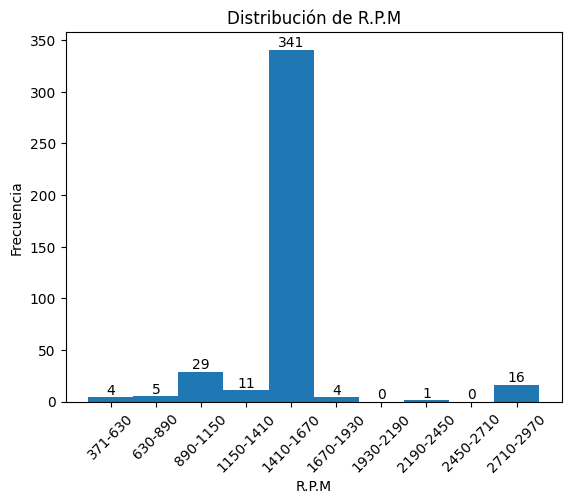

In [7]:
# Crear el histograma de la columna 'R.P.M'
conteos, bins, patches = plt.hist(motores_unicos1['R.P.M'], bins=10)  # Ajusta el número de bins según sea necesario

# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(conteos, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)
# Configurar el color de fondo del gráfico

# Configurar etiquetas y título del gráfico
plt.xlabel('R.P.M')
plt.ylabel('Frecuencia')
plt.title('Distribución de R.P.M')
# Mostrar el gráfico
plt.show()


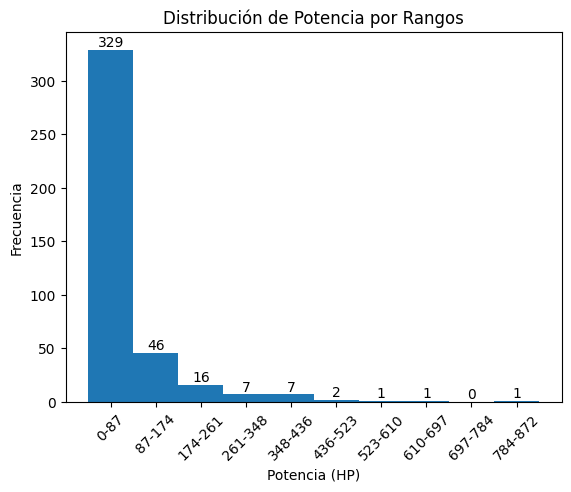

In [8]:
# Crear el histograma de la columna 'POTENCIA (HP)'
conteos, bins, patches = plt.hist(motores_unicos1['POTENCIA (HP)'], bins=10)
# Agregar etiquetas en la parte superior de cada barra
for count, x in zip(conteos, bins):
    plt.text(x + (bins[1] - bins[0]) / 2,  # Posición horizontal, centrada en cada barra
             count,  # Posición vertical (altura del texto)
             str(int(count)),  # Etiqueta de texto
             ha='center', va='bottom', fontsize=10)  # Alineación y tamaño de fuente

# Crear etiquetas personalizadas para los ticks del eje X utilizando los rangos
bin_labels = [f'{int(bins[i])}-{int(bins[i+1])}' for i in range(len(bins)-1)]
plt.xticks(ticks=bins[:-1] + (bins[1] - bins[0]) / 2, labels=bin_labels, rotation=45)

# Configurar etiquetas y título del gráfico
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
plt.title('Distribución de Potencia por Rangos')

# Mostrar el gráfico
plt.show()

## SELECCION Y ANALISIS DEL SEGMENTO CRITICO




# Mapas de Calor Consolidado 2 y Motores Unicos

<ipython-input-9-175902033047>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  consolidado2['Rango_Potencia'] = pd.cut(consolidado2['POTENCIA (HP)'], bins=bins, labels=labels, include_lowest=True)
<ipython-input-9-175902033047>:7: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = consolidado2.pivot_table(index='Rango_Potencia', columns='Polos', values='POTENCIA (HP)', aggfunc='count')


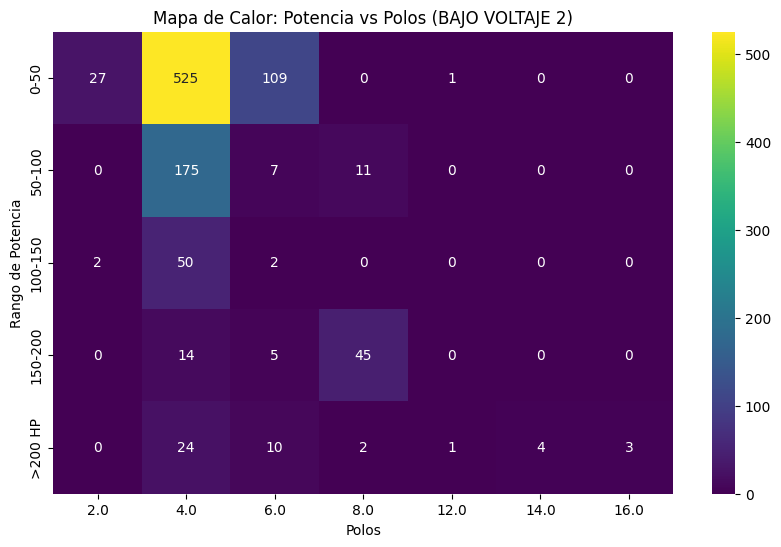

In [9]:
# Crear bins para la potencia
bins = [0, 50, 100, 150, 200, float('inf')]
labels = ['0-50', '50-100', '100-150', '150-200', '>200 HP']
consolidado2['Rango_Potencia'] = pd.cut(consolidado2['POTENCIA (HP)'], bins=bins, labels=labels, include_lowest=True)

# Crear una tabla pivote para el mapa de calor
heatmap_data = consolidado2.pivot_table(index='Rango_Potencia', columns='Polos', values='POTENCIA (HP)', aggfunc='count')

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="viridis")
plt.title('Mapa de Calor: Potencia vs Polos (BAJO VOLTAJE 2)')
plt.xlabel('Polos')
plt.ylabel('Rango de Potencia')
plt.show()


<ipython-input-10-08c557fdf78b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motores_unicos1['Power Range'] = pd.cut(motores_unicos1['POTENCIA (HP)'], bins=bins, labels=labels)
<ipython-input-10-08c557fdf78b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  pivot_table = motores_unicos1.groupby(['Power Range', 'Polos']).size().unstack()


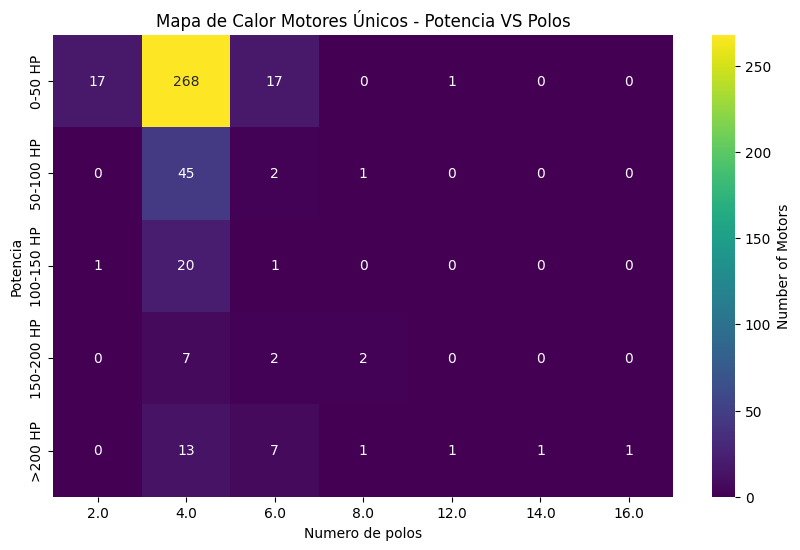

In [10]:
# Create bins for power ranges
bins = [0, 50, 100, 150, 200, float('inf')]  # Adjust bins as needed
labels = ['0-50 HP', '50-100 HP', '100-150 HP', '150-200 HP', '>200 HP']
motores_unicos1['Power Range'] = pd.cut(motores_unicos1['POTENCIA (HP)'], bins=bins, labels=labels)

# Create a pivot table to count motors by power range and poles
pivot_table = motores_unicos1.groupby(['Power Range', 'Polos']).size().unstack()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Number of Motors'})
plt.title('Mapa de Calor Motores Únicos - Potencia VS Polos')
plt.xlabel('Numero de polos')
plt.ylabel('Potencia')
plt.show()

# Filtrado 2 (Motores Objetivos)

In [11]:
motores_objetivos = consolidado2[
    (consolidado['POTENCIA (HP)'] <= 100) &
    (consolidado['Polos'] == 4) ]

print(len(motores_objetivos))

700


<ipython-input-11-6f6264c63c5b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  motores_objetivos = consolidado2[


In [12]:
print(f"Total de motores objetivos : {len(motores_objetivos)}")
print(f"Total de motores objetivos con características repetidas(unicos): {sum(len(grupo) >= 1 for _, grupo in motores_objetivos.groupby(['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME']))}")


Total de motores objetivos : 700
Total de motores objetivos con características repetidas(unicos): 313


In [13]:
#DATA MOTORES UNICOS
motores_unicos = motores_objetivos.drop_duplicates(subset=['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME','Polos'])
print(f"Cantidad de motores objetivos unicos: {len(motores_unicos)}")
#print(motores_unicos)


Cantidad de motores objetivos unicos: 313


# ID PARA MOTORES Y CANTIDADES


Crear ID para cada motor unico

In [14]:
# AGREGAR ID A CADA MOTOR UNICO
import string

def generate_unique_id(df):
  """
  Genera un ID único para cada motor en el DataFrame.

  Args:
    df: DataFrame con motores únicos.

  Returns:
    DataFrame con una nueva columna 'ID_Motor' con IDs únicos.
  """

  df['ID_Motor'] = ['M' + str(i).zfill(3) for i in range(1, len(df) + 1)]
  return df

motores_unicos = generate_unique_id(motores_unicos)

print(motores_unicos)


        N° PROCESO SECTOR/UBICACIÓN                EQUIPO           MARCA   \
0        1  04 PPC     FILTROS MOLY     FILTRO TAMBOR 601              WEG   
2        3  04 PPC     FILTROS MOLY  FILTRO ACCIONAMIENTO   ALLIS CHALMERS   
8        9  04 PPC     FILTROS MOLY   FILTRO TOR. SIN FIN           LENZE    
9       10  04 PPC              NaN          TORNILLO N°5           S/DATO   
10      11  04 PPC     FILTROS MOLY     BOMBA ACEITE Nº 1   ALLIS CHALMERS   
...    ...     ...              ...                   ...              ...   
1160  1162  03 PMC     PLANTA P.T.R          BOMBA Nº 773  U.S. ELECTRICAL   
1164  1166  03 PMC     PLANTA P.T.R          BOMBA Nº 793  U.S. ELECTRICAL   
1167  1169  03 PMC     PLANTA P.T.R          BOMBA Nº 750             ASEA   
1168  1170  03 PMC     PLANTA P.T.R          BOMBA Nº 751             ASEA   
1174  1176  03 PMC     PLANTA P.T.R          BOMBA Nº 786             TECO   

                   Nº SERIE   FRAME  POTENCIA (HP) VOLTAJE   R.

<ipython-input-14-d60e244aab7e>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ID_Motor'] = ['M' + str(i).zfill(3) for i in range(1, len(df) + 1)]


Agregar ID a motores objetivos

In [15]:
# AGREGAR ID A MOTORES OBJETIVOS
motores_objetivos= pd.merge(motores_objetivos, motores_unicos[['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME', 'ID_Motor']],
                                    on=['MARCA ', 'R.P.M', 'POTENCIA (HP)', 'FRAME'], how='left')

print(motores_objetivos)

       N° PROCESO SECTOR/UBICACIÓN                EQUIPO          MARCA   \
0       1  04 PPC     FILTROS MOLY     FILTRO TAMBOR 601             WEG   
1       3  04 PPC     FILTROS MOLY  FILTRO ACCIONAMIENTO  ALLIS CHALMERS   
2       9  04 PPC     FILTROS MOLY   FILTRO TOR. SIN FIN          LENZE    
3      10  04 PPC              NaN          TORNILLO N°5          S/DATO   
4      11  04 PPC     FILTROS MOLY     BOMBA ACEITE Nº 1  ALLIS CHALMERS   
..    ...     ...              ...                   ...             ...   
695  1170  03 PMC     PLANTA P.T.R          BOMBA Nº 751            ASEA   
696  1171  03 PMC     PLANTA P.T.R          BOMBA Nº 752             WEG   
697  1172  03 PMC     PLANTA P.T.R          BOMBA Nº 756          BALDOR   
698  1174  03 PMC     PLANTA P.T.R          BOMBA Nº 758  ALLIS CHALMERS   
699  1176  03 PMC     PLANTA P.T.R          BOMBA Nº 786            TECO   

                Nº SERIE   FRAME  POTENCIA (HP) VOLTAJE   R.P.M  \
0                AS3

In [ ]:
#DESCARGAR EXCEL DE MOTORES OBJETIVOS
#motores_objetivos.to_excel('Motores_Objetivos.xlsx', index=False)

In [16]:
#CONTEO DE MOTORES
conteo_motores_unicos = motores_objetivos.groupby('ID_Motor')['ID_Motor'].count().sort_values(ascending=False)
print(conteo_motores_unicos)


ID_Motor
M207    40
M204    38
M010    27
M098    15
M205     9
        ..
M127     1
M129     1
M131     1
M142     1
M313     1
Name: ID_Motor, Length: 313, dtype: int64


Agregar cantidad de motores a data de motores unicos

In [17]:
# Contar la cantidad de motores para cada motor único
conteo_motores = motores_objetivos.groupby('ID_Motor')['ID_Motor'].count().reset_index(name='CANTIDAD')

# Unir la información del conteo al DataFrame de motores únicos
motores_unicos = pd.merge(motores_unicos, conteo_motores, on='ID_Motor', how='left')

# Motores unicos con columnas reducidas (para despues descargar columnas realmente importantes) y codificacion de FRAME

In [18]:
motores_unicos_reducidos = motores_unicos[['ID_Motor', 'R.P.M', 'POTENCIA (HP)', 'VOLTAJE', 'FRAME', 'MARCA ', 'CANTIDAD' ]]
print(motores_unicos_reducidos)


    ID_Motor   R.P.M  POTENCIA (HP) VOLTAJE   FRAME           MARCA   CANTIDAD
0       M001  1480.0            3.0     575   184-T              WEG         1
1       M002  1450.0            1.0     575   145-T   ALLIS CHALMERS         1
2       M003  1420.0            3.0     575  S/DATO           LENZE          1
3       M004  1455.0            3.0     575   132-M           S/DATO         1
4       M005  1450.0           10.0     550   254-T   ALLIS CHALMERS         4
..       ...     ...            ...     ...     ...              ...       ...
308     M309  1475.0           60.0     575   365-T  U.S. ELECTRICAL         4
309     M310  1475.0           40.0     575   326-T  U.S. ELECTRICAL         1
310     M311  1470.0           13.0     575  S/DATO             ASEA         1
311     M312  1470.0           30.0     575  S/DATO             ASEA         1
312     M313  1455.0           40.0     575   225-S             TECO         1

[313 rows x 7 columns]


In [19]:
from sklearn.preprocessing import LabelEncoder

# Crear un LabelEncoder
le = LabelEncoder()
# Ajustar y transformar la columna 'FRAME' a una representación numérica
motores_unicos_reducidos['FRAME_codificado'] = le.fit_transform(motores_unicos_reducidos['FRAME'])

<ipython-input-19-b942b8fdcac9>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motores_unicos_reducidos['FRAME_codificado'] = le.fit_transform(motores_unicos_reducidos['FRAME'])


# Graficos del conjunto de motores unicos de los motores objetivos


# Descriptivos

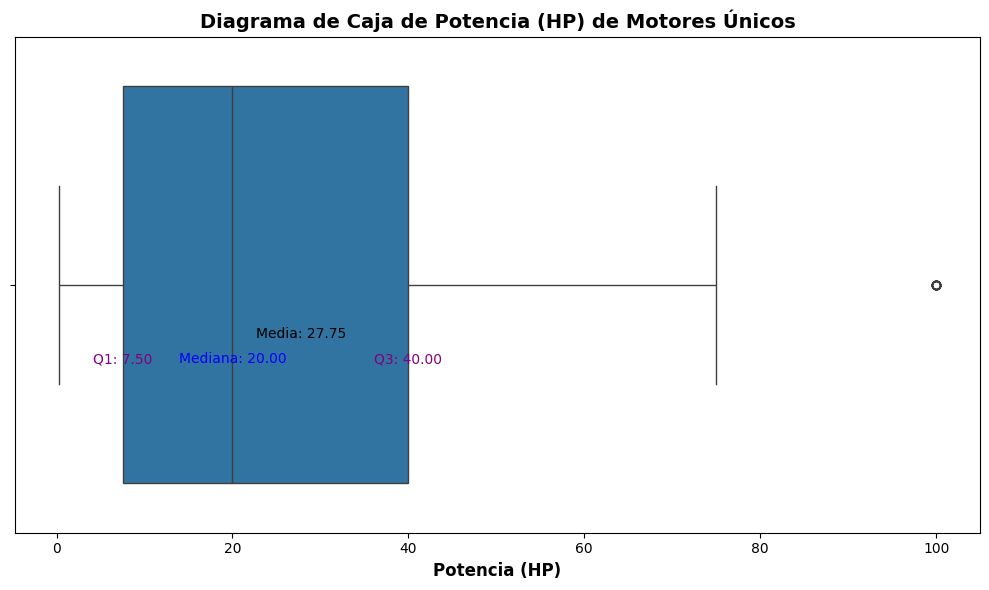

In [20]:
# Calcular los estadísticos importantes
potencia_hp = motores_unicos['POTENCIA (HP)']
median_hp = potencia_hp.median()
mean_hp = potencia_hp.mean()
q1_hp = potencia_hp.quantile(0.25)
q3_hp = potencia_hp.quantile(0.75)

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='POTENCIA (HP)', data=motores_unicos)

# Título y etiquetas
plt.title('Diagrama de Caja de Potencia (HP) de Motores Únicos', fontsize=14, fontweight='bold')
plt.xlabel('Potencia (HP)', fontsize=12, fontweight='bold')

# Anotar la media, mediana y cuartiles en el gráfico
plt.text(mean_hp, 0.1, f'Media: {mean_hp:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.text(median_hp, 0.15, f'Mediana: {median_hp:.2f}', ha='center', va='center', color='blue', fontsize=10)
plt.text(q1_hp, 0.15, f'Q1: {q1_hp:.2f}', ha='center', va='center', color='purple', fontsize=10)
plt.text(q3_hp, 0.15, f'Q3: {q3_hp:.2f}', ha='center', va='center', color='purple', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


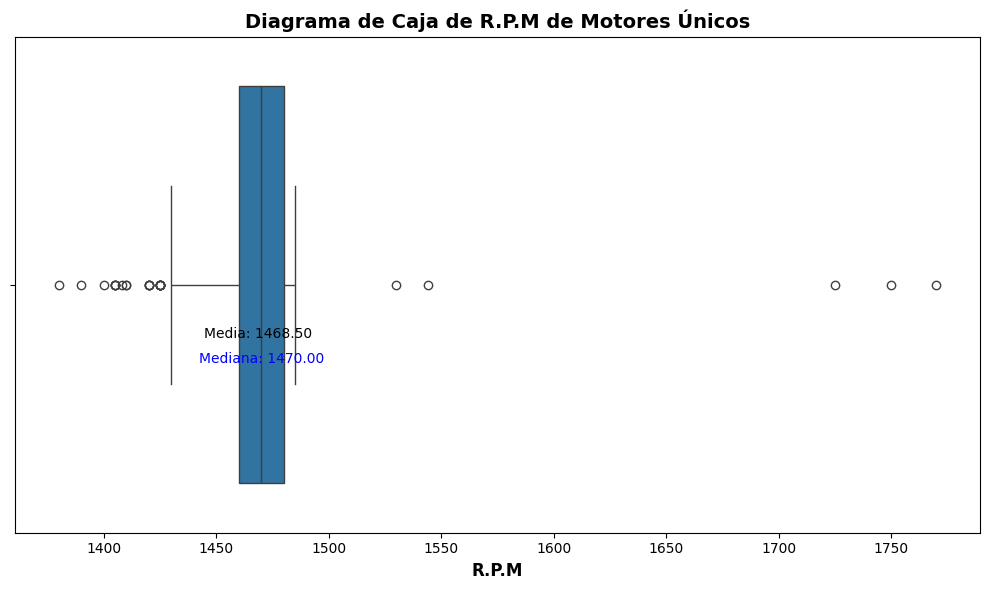

In [21]:
# Calcular los estadísticos importantes
rpm = motores_unicos['R.P.M']
median_rpm = rpm.median()
mean_rpm = rpm.mean()
q1_rpm = rpm.quantile(0.25)
q3_rpm = rpm.quantile(0.75)

# Crear el diagrama de caja
plt.figure(figsize=(10, 6))
sns.boxplot(x='R.P.M', data=motores_unicos)

# Título y etiquetas
plt.title('Diagrama de Caja de R.P.M de Motores Únicos', fontsize=14, fontweight='bold')
plt.xlabel('R.P.M', fontsize=12, fontweight='bold')

# Anotar la media, mediana en el gráfico
plt.text(mean_rpm, 0.1, f'Media: {mean_rpm:.2f}', ha='center', va='center', color='black', fontsize=10)
plt.text(median_rpm, 0.15, f'Mediana: {median_rpm:.2f}', ha='center', va='center', color='blue', fontsize=10)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# Distribuciones Numericas

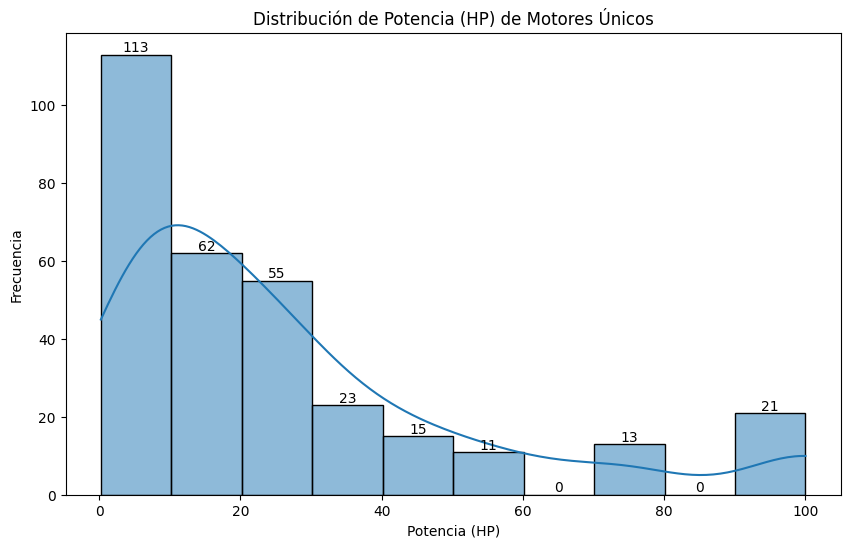

In [22]:

# Crear el histograma de la columna 'POTENCIA (HP)' para los motores únicos
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura
sns.histplot(motores_unicos['POTENCIA (HP)'], kde=True, bins=10)
plt.title('Distribución de Potencia (HP) de Motores Únicos')
plt.xlabel('Potencia (HP)')
plt.ylabel('Frecuencia')
# Agregar etiquetas con la cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()


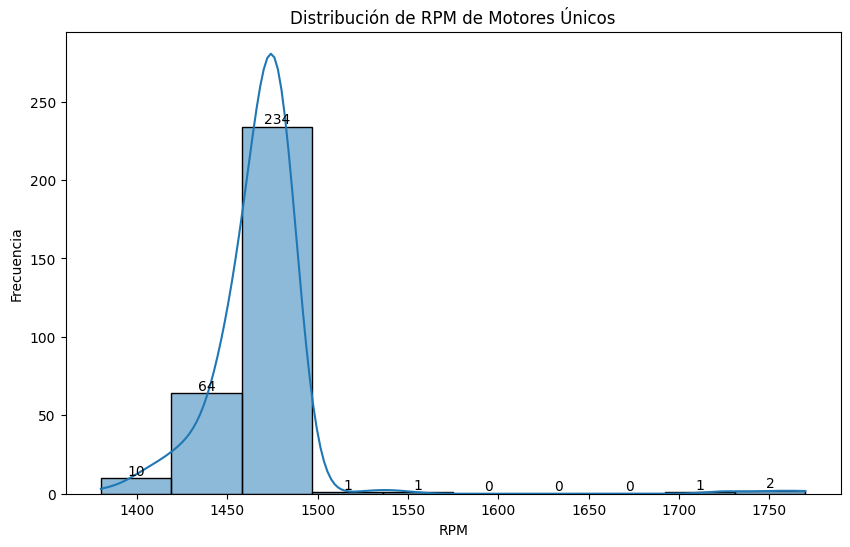

In [23]:
# Crear el histograma de la columna 'R.P.M' para los motores únicos
plt.figure(figsize=(10, 6))
sns.histplot(motores_unicos['R.P.M'], kde=True, bins=10)
plt.title('Distribución de RPM de Motores Únicos')
plt.xlabel('RPM')
plt.ylabel('Frecuencia')
# Agregar etiquetas con la cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                ha='center', va='bottom', fontsize=10)
plt.show()



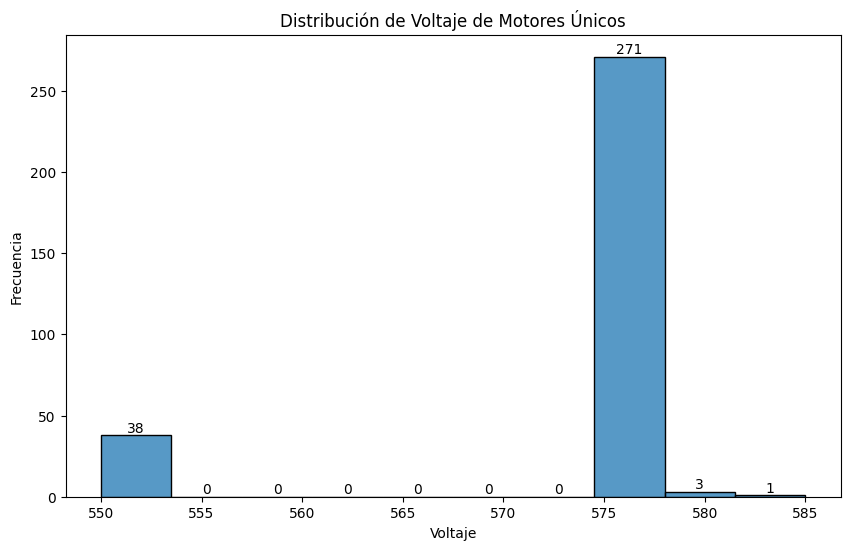

In [24]:
# Crear el histograma de la columna 'VOLTAJE' para los motores únicos
plt.figure(figsize=(10, 6))
sns.histplot(motores_unicos['VOLTAJE'], kde=False, bins=10)
plt.title('Distribución de Voltaje de Motores Únicos')
plt.xlabel('Voltaje')
plt.ylabel('Frecuencia')

# Agregar etiquetas con la cantidad en cada barra
for p in plt.gca().patches:
    plt.gca().text(p.get_x() + p.get_width() / 2., p.get_height(), '%d' % int(p.get_height()),
                ha='center', va='bottom', fontsize=10)

plt.show()

# Graficos con Categorias

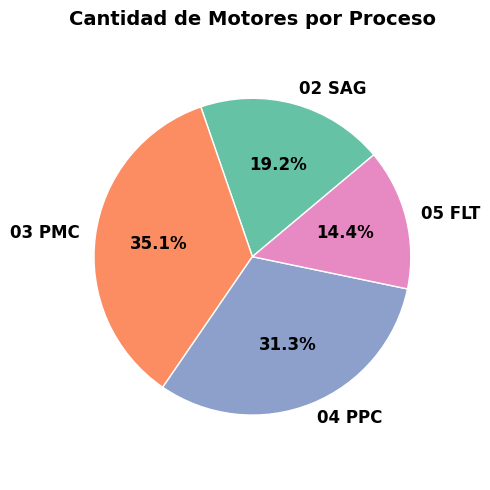

In [25]:
# Agrupar los motores por proceso y contar la cantidad de motores en cada proceso
motores_por_proceso = motores_unicos.groupby('PROCESO')['MARCA '].count()

# Definir colores usando la paleta de Seaborn
colors = sns.color_palette('Set2', len(motores_por_proceso))

# Crear el gráfico de torta
plt.figure(figsize=(5, 5))
plt.pie(motores_por_proceso, labels=motores_por_proceso.index, autopct='%1.1f%%', startangle=40, colors=colors,
        wedgeprops={'edgecolor': 'white'}, textprops={'fontsize': 12, 'fontweight': 'bold'})

# Título con estilo
plt.title('Cantidad de Motores por Proceso', fontsize=14, fontweight='bold')

# Asegurar que el gráfico sea circular
plt.axis('equal')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


<ipython-input-26-06d88f80a159>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=motores_por_proceso.index, y=motores_por_proceso.values, palette="viridis")


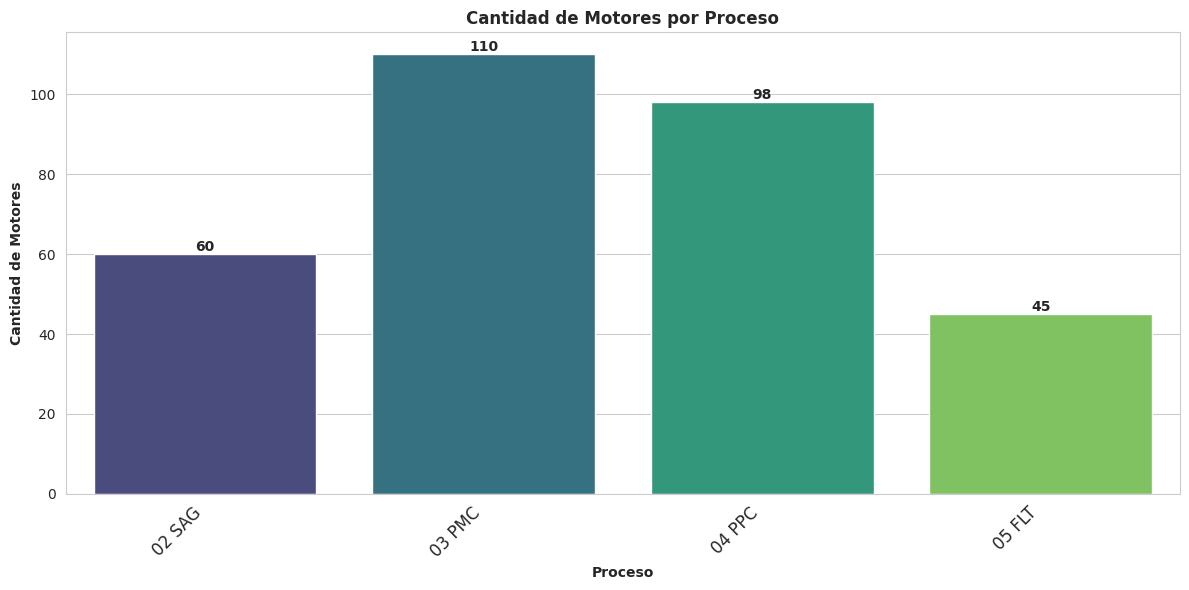

In [26]:
# Contar la cantidad de motores por proceso
motores_por_proceso = motores_unicos.groupby('PROCESO')['MARCA '].count()

# Configuración general del gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo de fondo más elegante

# Crear gráfico de barras con colores gradientes
bars = sns.barplot(x=motores_por_proceso.index, y=motores_por_proceso.values, palette="viridis")

# Agregar etiquetas de valor en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Etiquetas y título
plt.xlabel('Proceso',fontsize=10, fontweight='bold')
plt.ylabel('Cantidad de Motores',fontsize=10, fontweight='bold')
plt.title('Cantidad de Motores por Proceso',fontweight ='semibold')

# Rotación de las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=12)

# Ajuste de los márgenes y presentación final
plt.tight_layout()
plt.show()

<ipython-input-27-d804699e3392>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette="viridis")


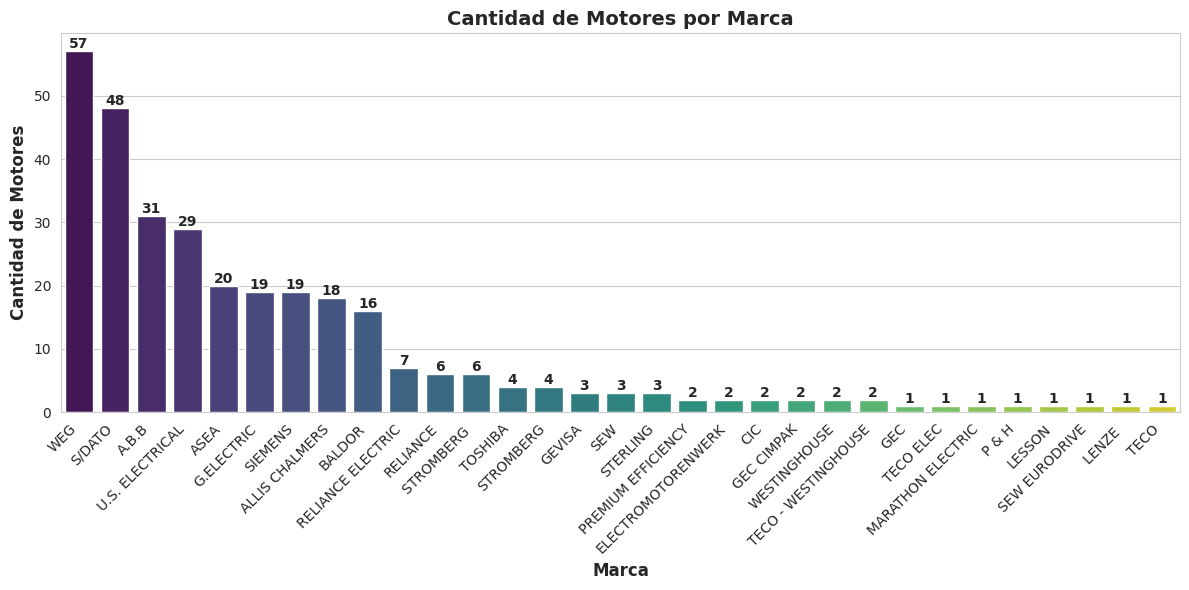

In [27]:
# Contar la cantidad de motores por marca
marca_counts = motores_unicos['MARCA '].value_counts()

# Configuración general del gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo de fondo más elegante

# Crear gráfico de barras con colores gradientes
bars = sns.barplot(x=marca_counts.index, y=marca_counts.values, palette="viridis")

# Agregar etiquetas de valor en cada barra
for bar in bars.patches:
    yval = bar.get_height()
    bars.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom', fontsize=10, fontweight='bold')

# Etiquetas y título
plt.xlabel('Marca', fontsize=12, fontweight='bold')
plt.ylabel('Cantidad de Motores', fontsize=12, fontweight='bold')
plt.title('Cantidad de Motores por Marca', fontsize=14, fontweight='bold')

# Rotación de las etiquetas del eje x para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=10)

# Ajuste de los márgenes y presentación final
plt.tight_layout()
plt.show()

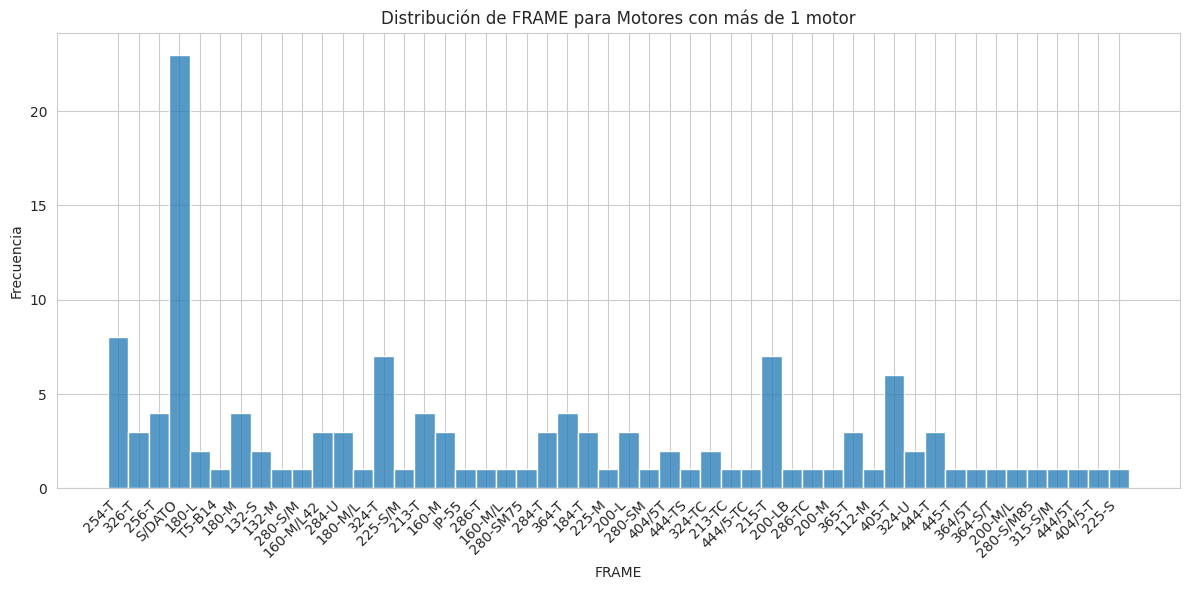

In [28]:
#Crear un histograma de la distribución de FRAME para motores con más de un motor
plt.figure(figsize=(12, 6))
sns.histplot(motores_unicos[motores_unicos['CANTIDAD'] > 1]['FRAME'], kde=False, bins=20)
plt.title('Distribución de FRAME para Motores con más de 1 motor')
plt.xlabel('FRAME')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráficos de dispersión 2D Y 3D

<ipython-input-29-6e137e9b2a14>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', num_frames)


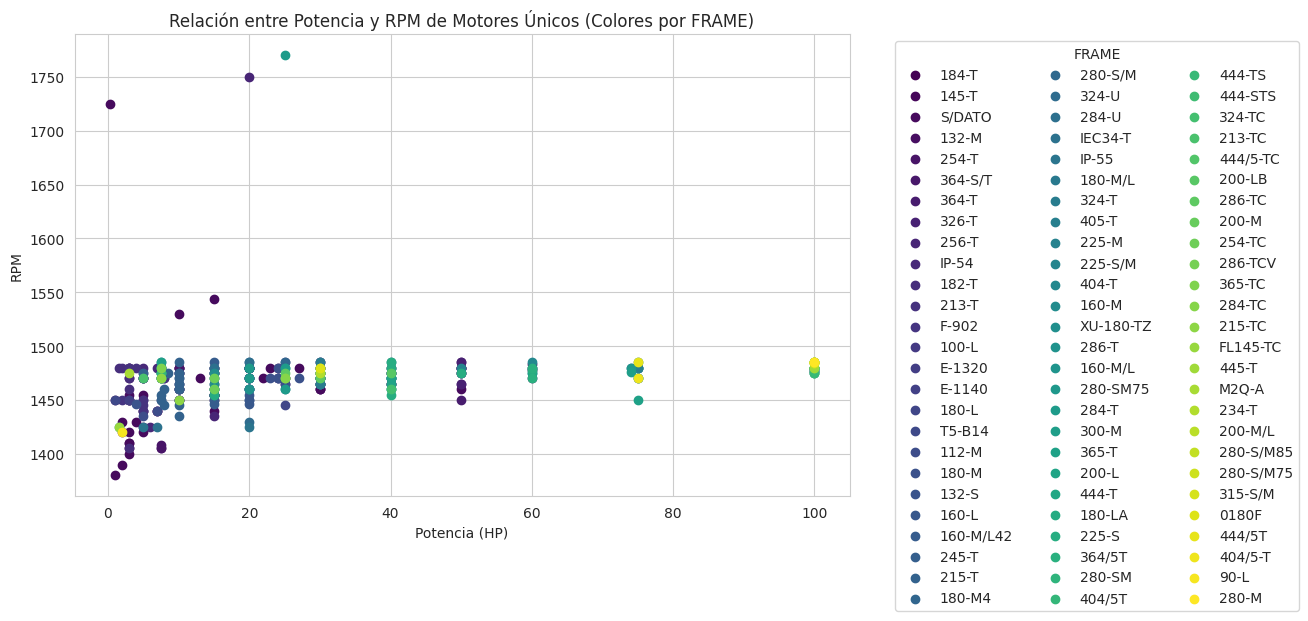

In [29]:
# Gráfico de dispersión de Potencia vs RPM con colores por FRAME
plt.figure(figsize=(10, 6))

# Crear una lista de colores únicos para cada FRAME
frames = motores_unicos['FRAME'].unique()
num_frames = len(frames)
colors = plt.cm.get_cmap('viridis', num_frames)

# Iterar sobre los FRAME y graficar los puntos con colores diferentes
for i, frame in enumerate(frames):
  subset = motores_unicos[motores_unicos['FRAME'] == frame]
  plt.scatter(subset['POTENCIA (HP)'], subset['R.P.M'], label=frame, color=colors(i))

plt.title('Relación entre Potencia y RPM de Motores Únicos (Colores por FRAME)')
plt.xlabel('Potencia (HP)')
plt.ylabel('RPM')
plt.legend(title='FRAME', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=3)
plt.show()

Mismo grafico anterior pero en 3D y con figuras

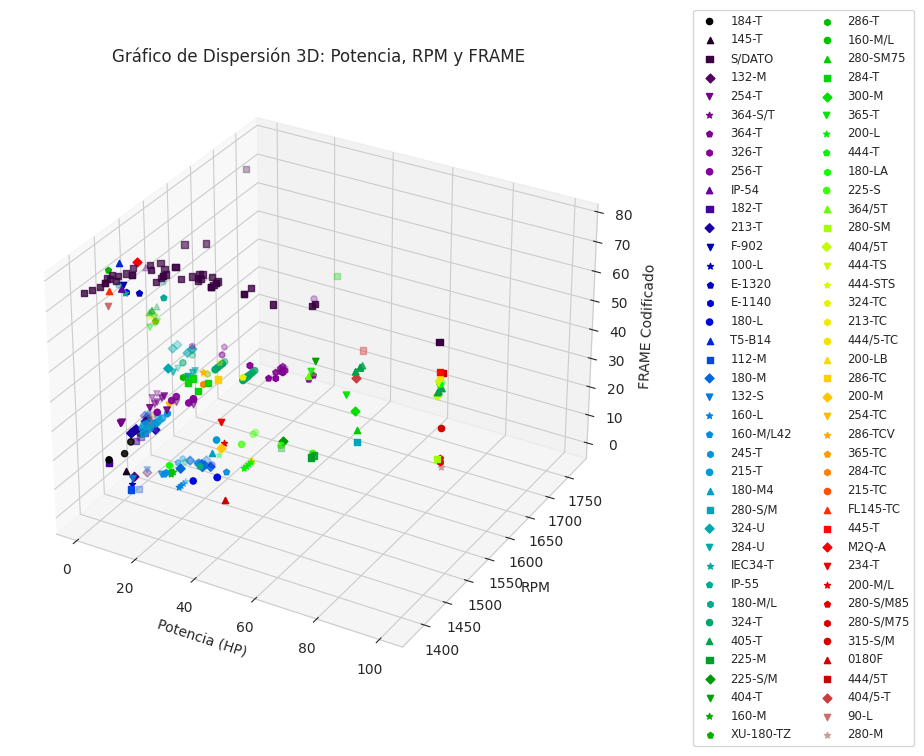

In [30]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a list of unique frame values
unique_frames = motores_unicos_reducidos['FRAME'].unique()

# Define a list of markers for each frame
markers = ['o', '^', 's', 'D', 'v', '*', 'p', 'h']

# Create a dictionary to map frame values to colors
color_map = {frame: plt.cm.nipy_spectral(i / len(unique_frames)) for i, frame in enumerate(unique_frames)}

for frame in unique_frames:
    frame_data = motores_unicos_reducidos[motores_unicos_reducidos['FRAME'] == frame]

    # Select a marker for the frame (looping through markers)
    marker_index = unique_frames.tolist().index(frame) % len(markers)
    marker = markers[marker_index]


    # Scatter plot with color-encoding based on 'frame'
    scatter = ax.scatter(frame_data['POTENCIA (HP)'],
                         frame_data['R.P.M'],
                         frame_data['FRAME_codificado'],
                         c=[color_map[frame]] * len(frame_data),
                         marker=marker,
                         label=frame)


ax.set_xlabel('Potencia (HP)')
ax.set_ylabel('RPM')
ax.set_zlabel('FRAME Codificado')

# Add a legend to show the mapping of colors and markers to 'frame' values
plt.legend(loc='center left', bbox_to_anchor=(1.1, 0.5), fontsize='small', ncol=2) # Ajusta la posición y el número de columnas

plt.title('Gráfico de Dispersión 3D: Potencia, RPM y FRAME')

plt.show()

# tabla de frames

In [31]:
# Crear una tabla de frames con frame codificado, frame y cantidad de registros
tabla_frames = motores_unicos_reducidos.groupby(['FRAME_codificado', 'FRAME'])['ID_Motor'].count().reset_index(name='Cantidad_Registros')

print(tabla_frames)

    FRAME_codificado      FRAME  Cantidad_Registros
0                  0      0180F                   1
1                  1      100-L                   1
2                  2      112-M                   2
3                  3      132-M                   2
4                  4      132-S                   3
..               ...        ...                 ...
73                73      IP-55                   3
74                74      M2Q-A                   1
75                75     S/DATO                  50
76                76     T5-B14                   1
77                77  XU-180-TZ                   1

[78 rows x 3 columns]


In [32]:
#para conocer los frame
lista_n = [47, 21, 19, 18, 12, 10, 8, 7, 6, 5, 4, 3, 2, 1]

for i in lista_n:
  frames = tabla_frames[tabla_frames['Cantidad_Registros'] == i]
  print(f"frames con {i} registros")
  print(frames)


frames con 47 registros
Empty DataFrame
Columns: [FRAME_codificado, FRAME, Cantidad_Registros]
Index: []
frames con 21 registros
    FRAME_codificado  FRAME  Cantidad_Registros
47                47  324-T                  21
frames con 19 registros
    FRAME_codificado  FRAME  Cantidad_Registros
23                23  215-T                  19
frames con 18 registros
    FRAME_codificado  FRAME  Cantidad_Registros
30                30  254-T                  18
frames con 12 registros
    FRAME_codificado  FRAME  Cantidad_Registros
21                21  213-T                  12
frames con 10 registros
    FRAME_codificado  FRAME  Cantidad_Registros
12                12  180-M                  10
frames con 8 registros
    FRAME_codificado  FRAME  Cantidad_Registros
32                32  256-T                   8
50                50  326-T                   8
frames con 7 registros
    FRAME_codificado  FRAME  Cantidad_Registros
15                15  182-T                   7
52       